In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as scs
from ctr_function import dist_explore

from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Using TensorFlow backend.


In [3]:
ctr = pd.read_csv("data/test/ctr_ad_user_test.csv")

In [4]:
ctr.drop(['Unnamed: 0', 'nonclk', 'time_stamp'], axis = 1, inplace= True)

In [5]:
ctr['time'] = pd.to_datetime(ctr['time'])

In [6]:
ctr['hour'] = ctr['time'].dt.hour 

In [7]:
ctr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3270320 entries, 0 to 3270319
Data columns (total 19 columns):
user                     int64
adgroup_id               int64
pid                      object
clk                      int64
time                     datetime64[ns]
cate_id                  int64
campaign_id              int64
customer                 int64
brand                    float64
price                    float64
cms_segid                float64
cms_group_id             float64
final_gender_code        float64
age_level                float64
pvalue_level             float64
shopping_level           float64
occupation               float64
new_user_class_level     float64
hour                     int64
dtypes: datetime64[ns](1), float64(10), int64(7), object(1)
memory usage: 474.1+ MB


In [8]:
ctr.head()

,user,adgroup_id,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,117840,11,430548_1007,0,2017-05-06 02:12:23,5239,384809,25745,134255.0,176.0,49.0,6.0,2.0,6.0,2.0,3.0,0.0,2.0,2
1,421590,11,430548_1007,0,2017-05-06 01:29:04,5239,384809,25745,134255.0,176.0,0.0,4.0,2.0,4.0,NaN,1.0,0.0,NaN,1
2,1065947,15,430539_1007,0,2017-05-06 07:13:10,7023,397386,51962,7465.0,65.0,0.0,5.0,2.0,5.0,NaN,3.0,0.0,NaN,7
3,329004,38,430548_1007,0,2017-05-06 14:09:27,4535,394495,5122,387739.0,1800.0,76.0,10.0,1.0,4.0,3.0,2.0,0.0,4.0,14
4,36923,38,430539_1007,0,2017-05-06 14:24:47,4535,394495,5122,387739.0,1800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [9]:
ctr[ctr.brand == 355626]

,user,adgroup_id,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
224506,33973,294404,430548_1007,0,2017-05-06 11:37:27,10579,22325,99386,355626.0,98.0,0.0,8.0,1.0,2.0,NaN,3.0,0.0,4.0,11
224507,13605,294404,430548_1007,0,2017-05-06 13:45:13,10579,22325,99386,355626.0,98.0,0.0,5.0,2.0,5.0,NaN,3.0,0.0,NaN,13
224508,567895,294404,430539_1007,0,2017-05-06 12:24:06,10579,22325,99386,355626.0,98.0,0.0,10.0,1.0,4.0,NaN,3.0,0.0,2.0,12
224509,467198,294404,430548_1007,0,2017-05-06 07:57:27,10579,22325,99386,355626.0,98.0,0.0,4.0,2.0,4.0,NaN,3.0,0.0,2.0,7
224510,816560,294404,430548_1007,0,2017-05-06 14:25:03,10579,22325,99386,355626.0,98.0,0.0,8.0,1.0,2.0,NaN,3.0,0.0,2.0,14
224511,876803,294404,430539_1007,0,2017-05-06 09:27:21,10579,22325,99386,355626.0,98.0,30.0,4.0,2.0,4.0,1.0,3.0,0.0,2.0,9
224512,791879,294404,430539_1007,0,2017-05-06 12:16:05,10579,22325,99386,355626.0,98.0,0.0,10.0,1.0,4.0,NaN,3.0,0.0,2.0,12
224513,407937,294404,430548_1007,0,2017-05-06 05:05:00,10579,22325,99386,355626.0,98.0,66.0,9.0,1.0,3.0,2.0,3.0,0.0,1.0,5
224514,1121613,294404,430548_1007,0,2017-05-06 15:40:21,10579,22325,99386,355626.0,98.0,0.0,4.0,2.0,4.0,NaN,2.0,0.0,4.0,15
224515,482258,294404,430548_1007,0,2017-05-06 14:02:18,10579,22325,99386,355626.0,98.0,81.0,10.0,1.0,4.0,2.0,3.0,0.0,4.0,14


In [10]:
ctr.columns

Index(['user', 'adgroup_id', 'pid', 'clk', 'time', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour'],
      dtype='object')

In [11]:
ctr.nunique()

user                     383353
adgroup_id               366284
pid                           2
clk                           2
time                      82856
cate_id                    5685
campaign_id              234228
customer                 154939
brand                     67642
price                      9987
cms_segid                    97
cms_group_id                 13
final_gender_code             2
age_level                     7
pvalue_level                  3
shopping_level                3
occupation                    2
new_user_class_level          4
hour                         24
dtype: int64

In [13]:
ctr.price.value_counts()

198.00      71397
98.00       68538
99.00       67895
128.00      57807
168.00      56704
298.00      51704
199.00      50853
158.00      47847
138.00      43332
398.00      38267
299.00      37805
118.00      37323
89.00       34410
188.00      33485
399.00      29127
69.00       28685
88.00       27597
258.00      27465
268.00      26393
109.00      26093
129.00      25967
119.00      25110
59.00       25006
159.00      24759
78.00       24247
58.00       24057
169.00      23907
79.00       23420
139.00      22661
108.00      22604
            ...  
433.87          1
9899.00         1
9930.00         1
207.80          1
9987.00         1
60.73           1
10132.00        1
202.80          1
10192.00        1
1457.00         1
321.11          1
9744.00         1
1505.50         1
62.48           1
3699.01         1
9525.00         1
9582.00         1
9604.00         1
80.99           1
405.28          1
18.11           1
36.10           1
194.80          1
9670.00         1
1484.00   

In [11]:
print('page views per user is %.2f'%(len(ctr)/ctr.user.nunique()))
print('views per ad is %.2f'%(len(ctr)/ctr.adgroup_id.nunique()))

page views per user is 8.53
views per ad is 8.93


In [12]:
ctr['pid'] = ctr.pid.apply(lambda x: 1 if x=='430548_1007' else 0)


In [13]:
ctr['price'] = ctr.price.apply(lambda x: np.log10(x))

In [14]:
ctr.to_csv('data/test/ctr_ad_user_test_ready.csv', index=False)

/Users/elainewu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


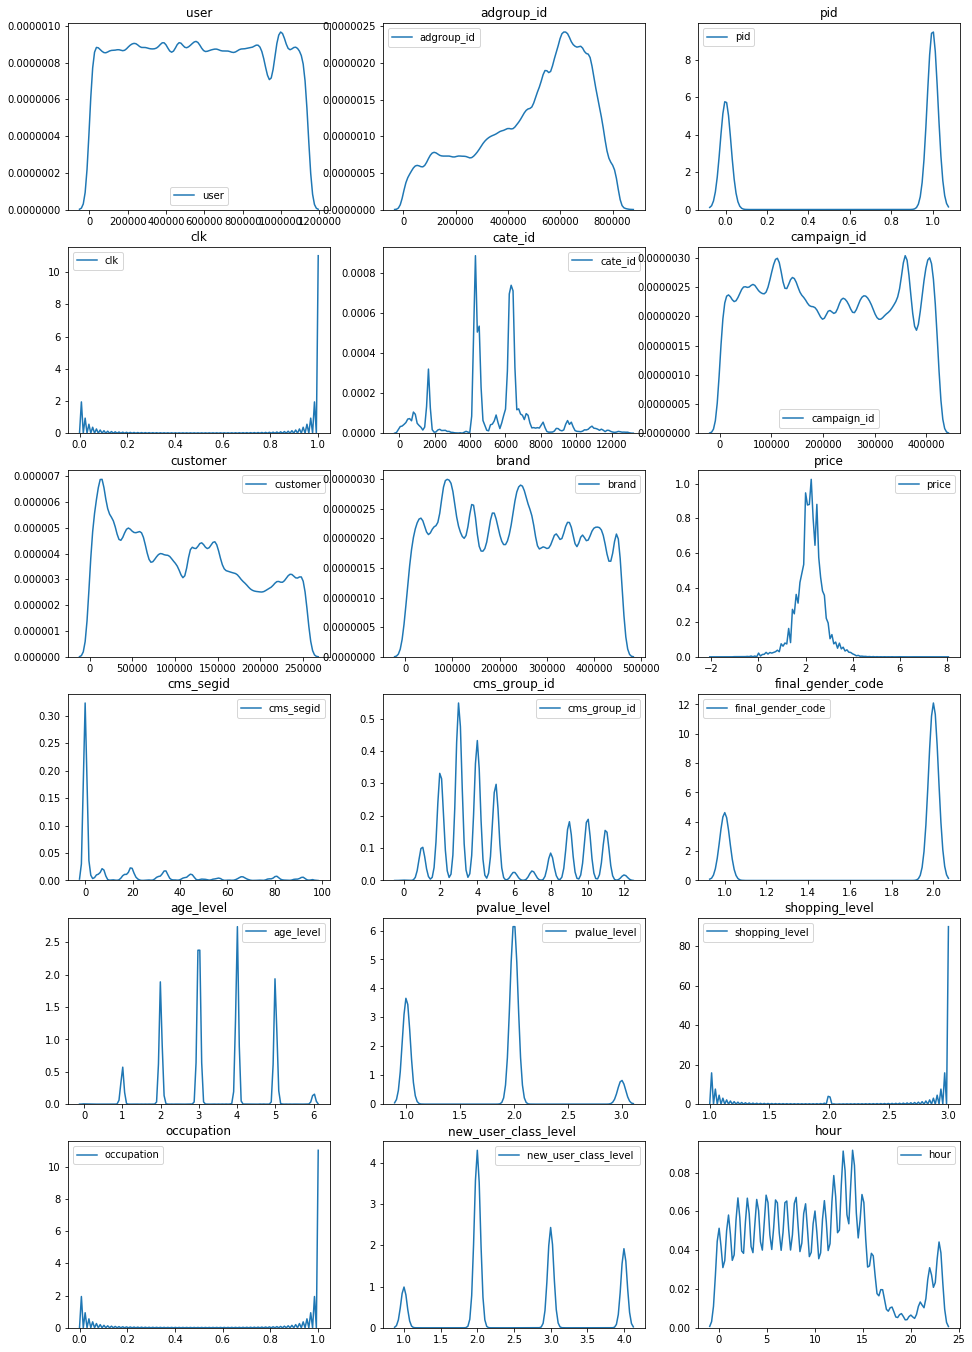

In [15]:
fig, axs = plt.subplots(6, 3, figsize =(16, 24))

cate_col_with_many_values = ['user', 'adgroup_id', 'pid', 'clk', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour']
for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr[cate_col_with_many_values[idx]], ax = ax)
    ax.set_title(cate_col_with_many_values[idx])

plt.savefig('Distribution_of_Available_Features.png')

Plot the features to identify some patterns

In [16]:
# scale down the price by getting log of the original price and plot with three features 'pid', 'price' and 'pvalue_level'

ctr_sample = ctr.iloc[:100000]
ctr_sample['log_price']=np.log10(ctr_sample['price'])

/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/Users/elainewu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [104]:
# ctr_sample.plot(kind='scatter', x = 'pid', y='log_price', c='pvalue_level',
#                 cmap='viridis',alpha = 0.6, figsize=(15,10));

Text(0, 0.5, 'log10(price)')

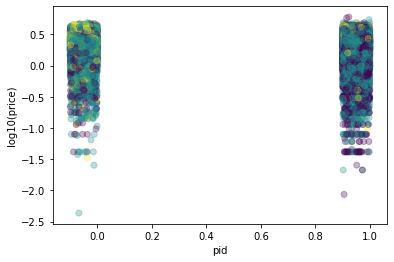

In [107]:
jitter = scs.uniform(-0.1,0.1).rvs(len(ctr_sample))
plt.scatter(x = ctr_sample['pid']+ jitter, y=ctr_sample['log_price'], c=ctr_sample['pvalue_level'],
                cmap='viridis',alpha = 0.3)
plt.xlabel('pid')
plt.ylabel('log10(price)')

Due to the highly overlapped data points, the plot above is not a good way to explore the relationship between features. We are going to plot the density distribution of each feature within click group and nonclick group to see if there is any difference in the distributions. So we can get some idea on which features have impact on click probability.

### Explore each features

##### views per user

In [59]:
ctr.head()

,user,adgroup_id,pid,clk,time,cate_id,campaign_id,customer,brand,price,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,117840,11,1,0,2017-05-06 02:12:23,5239,384809,25745,134255.0,2.245513,49.0,6.0,2.0,6.0,2.0,3.0,0.0,2.0,2
1,421590,11,1,0,2017-05-06 01:29:04,5239,384809,25745,134255.0,2.245513,0.0,4.0,2.0,4.0,NaN,1.0,0.0,NaN,1
2,1065947,15,0,0,2017-05-06 07:13:10,7023,397386,51962,7465.0,1.812913,0.0,5.0,2.0,5.0,NaN,3.0,0.0,NaN,7
3,329004,38,1,0,2017-05-06 14:09:27,4535,394495,5122,387739.0,3.255273,76.0,10.0,1.0,4.0,3.0,2.0,0.0,4.0,14
4,36923,38,0,0,2017-05-06 14:24:47,4535,394495,5122,387739.0,3.255273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [64]:
#Count the viewes by each user
user_view = ctr.groupby('user').size().sort_values()

In [65]:
user_view.head()

user
891680     1
137319     1
137320     1
45421      1
1061595    1
dtype: int64

We explore the distribution of the number of views per user below:

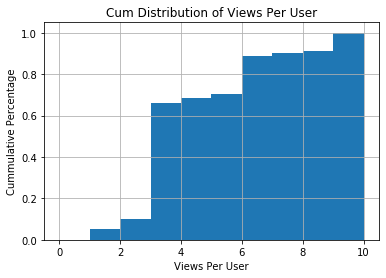

In [102]:
user_view.hist(range=(0,10), bins=10, cumulative=True, density=True)
plt.title('Cum Distribution of Views Per User')
plt.ylabel('Cummulative Percentage')
plt.xlabel('Views Per User')

plt.savefig('DistributionOfViewsPerUser.png')

60% of users have equal to or less than 5 page views;
84% of users have equal to or less than 10 page views

##### views per ad by a user

In [79]:
user_view_per_ad = ctr.groupby(['user', 'adgroup_id']).size().sort_values(ascending =False)

In [80]:
user_view_per_ad.head()

user    adgroup_id
40010   633086        6
        601687        5
660380  72063         5
557358  163650        5
660380  275050        5
dtype: int64

In [86]:
user_view_per_ad.value_counts()

1    3198002
2      32512
3       1977
4        298
5         33
6          1
dtype: int64

98.9% of user see an ad once; 

1% of user see an ad twice

##### views per ad

In [87]:
ad_view = ctr.groupby('adgroup_id').size().sort_values(ascending=False)

In [88]:
ad_view.head()

adgroup_id
710164    7956
747157    7026
711852    4801
690381    3990
681299    3520
dtype: int64

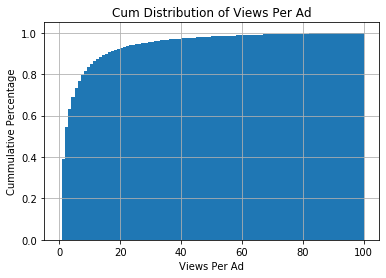

In [103]:
ad_view.hist(range=(0, 100), bins =100, density=True, cumulative=True)

plt.title('Cum Distribution of Views Per Ad')
plt.ylabel('Cummulative Percentage')
plt.xlabel('Views Per Ad')

plt.savefig('DistributionOfViewsPerAd.png')

0.624 of ads get equal to or less than 3 page views;

0.726 of ads get equal to or less than 5 page views;

0.839 of ads get equal to or less than 10 page views;

0.917 of ads get equal to or less than 20 page views

##### click through rate

In [109]:
#ctr measured by adgroup_id
ad_clk = ctr.groupby('adgroup_id').agg({'time': 'count', 'clk': 'sum'})

In [110]:
ad_clk['ctr'] = ad_clk['clk']/ad_clk['time']

In [122]:
ad_clk.columns = ['views', 'click', 'ctr']
ad_clk.sort_values('click', ascending= False).head()

,views,click,ctr
adgroup_id,,,
710164,7956,1056,0.132730
711852,4801,543,0.113101
747157,7026,461,0.065613
610477,2057,232,0.112786
632644,2214,220,0.099368


In [123]:
ad_clk.describe()

,views,click,ctr
count,366284.000000,366284.000000,366284.000000
mean,8.928373,0.465024,0.043509
std,41.245280,3.204655,0.145252
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,6.000000,0.000000,0.000000
max,7956.000000,1056.000000,1.000000


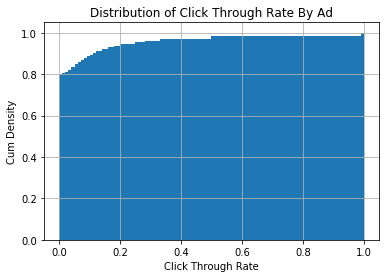

In [134]:
ad_clk['ctr'].hist(bins=100, density=True, cumulative=True)

plt.title('Distribution of Click Through Rate By Ad')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')

plt.savefig('CTRDensityDistribution.png')


Based on our analysis on views per user and per ad, we know the views per user per ad is very low and 98% of ads only get 1 view. So the click through rate measured by adgroup_id is very low. 80% of adds get 0 CTR. This will not provide much information for our prediction. Below we also use campaign_id, customer (advertiser id) and brand to measure the ctr.

In [118]:
#ctr measured by campaign_clk
campaign_clk = ctr.groupby('campaign_id').agg({'time': 'count', 'clk': 'sum'})

In [119]:
campaign_clk['ctr'] = campaign_clk['clk']/campaign_clk['time']

In [125]:
campaign_clk.columns = ['views', 'click', 'ctr']
campaign_clk.sort_values('click', ascending= False).head()

,views,click,ctr
campaign_id,,,
405490,17046,1838,0.107826
359520,17818,1073,0.060220
360936,12092,634,0.052431
98970,5787,469,0.081044
396664,4831,430,0.089008


Text(0.5, 0, 'Click Through Rate')

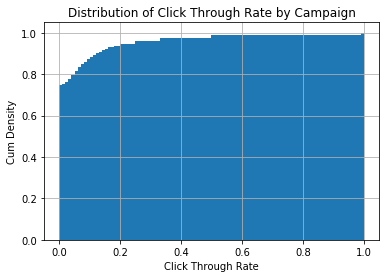

In [135]:
campaign_clk['ctr'].hist(bins=100, density=True, cumulative = True)

plt.title('Distribution of Click Through Rate by Campaign')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')

# plt.savefig('CTRDensityDistribution.png')

Text(0.5, 0, 'Click Through Rate')

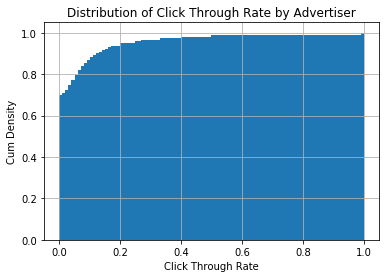

In [136]:
#ctr measured by customer
customer_clk = ctr.groupby('customer').agg({'time': 'count', 'clk': 'sum'})
customer_clk['ctr'] = customer_clk['clk']/customer_clk['time']
customer_clk.columns = ['views', 'click', 'ctr']

customer_clk['ctr'].hist(bins=100, density=True, cumulative=True)
plt.title('Distribution of Click Through Rate by Advertiser')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')

Text(0.5, 0, 'Click Through Rate')

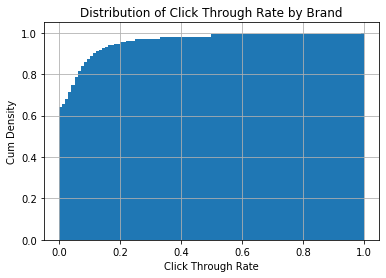

In [137]:
#ctr measured by brand
brand_clk = ctr.groupby('brand').agg({'time': 'count', 'clk': 'sum'})
brand_clk['ctr'] = brand_clk['clk']/brand_clk['time']
brand_clk.columns = ['views', 'click', 'ctr']

brand_clk['ctr'].hist(bins=100, density=True, cumulative=True)
plt.title('Distribution of Click Through Rate by Brand')
plt.ylabel('Cum Density')
plt.xlabel('Click Through Rate')

### Explore the relationship

In [48]:
ctr_clk = ctr[ctr.clk == 1]
ctr_noclk = ctr[ctr.clk == 0]

In [49]:
n = len(ctr_clk)
m = len(ctr_noclk)
print('the click through rate is %.3f'%(n/(n+m)))

the click through rate is 0.052


In [50]:
ctr_clk.nunique()

user                     106314
adgroup_id                72321
pid                           2
clk                           1
time                      63335
cate_id                    3483
campaign_id               59552
customer                  46530
brand                     24288
price                      4419
cms_segid                    97
cms_group_id                 13
final_gender_code             2
age_level                     7
pvalue_level                  3
shopping_level                3
occupation                    2
new_user_class_level          4
hour                         24
dtype: int64

In [53]:
ctr_clk.adgroup_id.value_counts()

710164    1056
711852     543
747157     461
610477     232
632644     220
690381     207
639504     202
681299     195
736349     183
581804     161
480290     159
632232     157
678712     150
677890     142
643419     141
601687     141
539743     140
630855     136
541053     132
715171     132
684497     130
608584     118
728025     113
748779     111
684724     110
602264     109
632866     109
736595     108
608016     106
659211     102
          ... 
57680        1
20806        1
590316       1
123376       1
649713       1
111098       1
410244       1
107128       1
219682       1
389746       1
352864       1
561758       1
158124       1
588371       1
289345       1
754236       1
516656       1
481831       1
215589       1
227875       1
483872       1
168478       1
700954       1
449047       1
442900       1
133645       1
408075       1
680448       1
104959       1
4098         1
Name: adgroup_id, Length: 72321, dtype: int64

In [366]:
related_features = ['adgroup_id', 'pid', 'cate_id', 'campaign_id',
       'customer', 'brand', 'price', 'cms_segid', 'cms_group_id',
       'final_gender_code', 'age_level', 'pvalue_level', 'shopping_level',
       'occupation', 'new_user_class_level ', 'hour']
y = ctr.clk

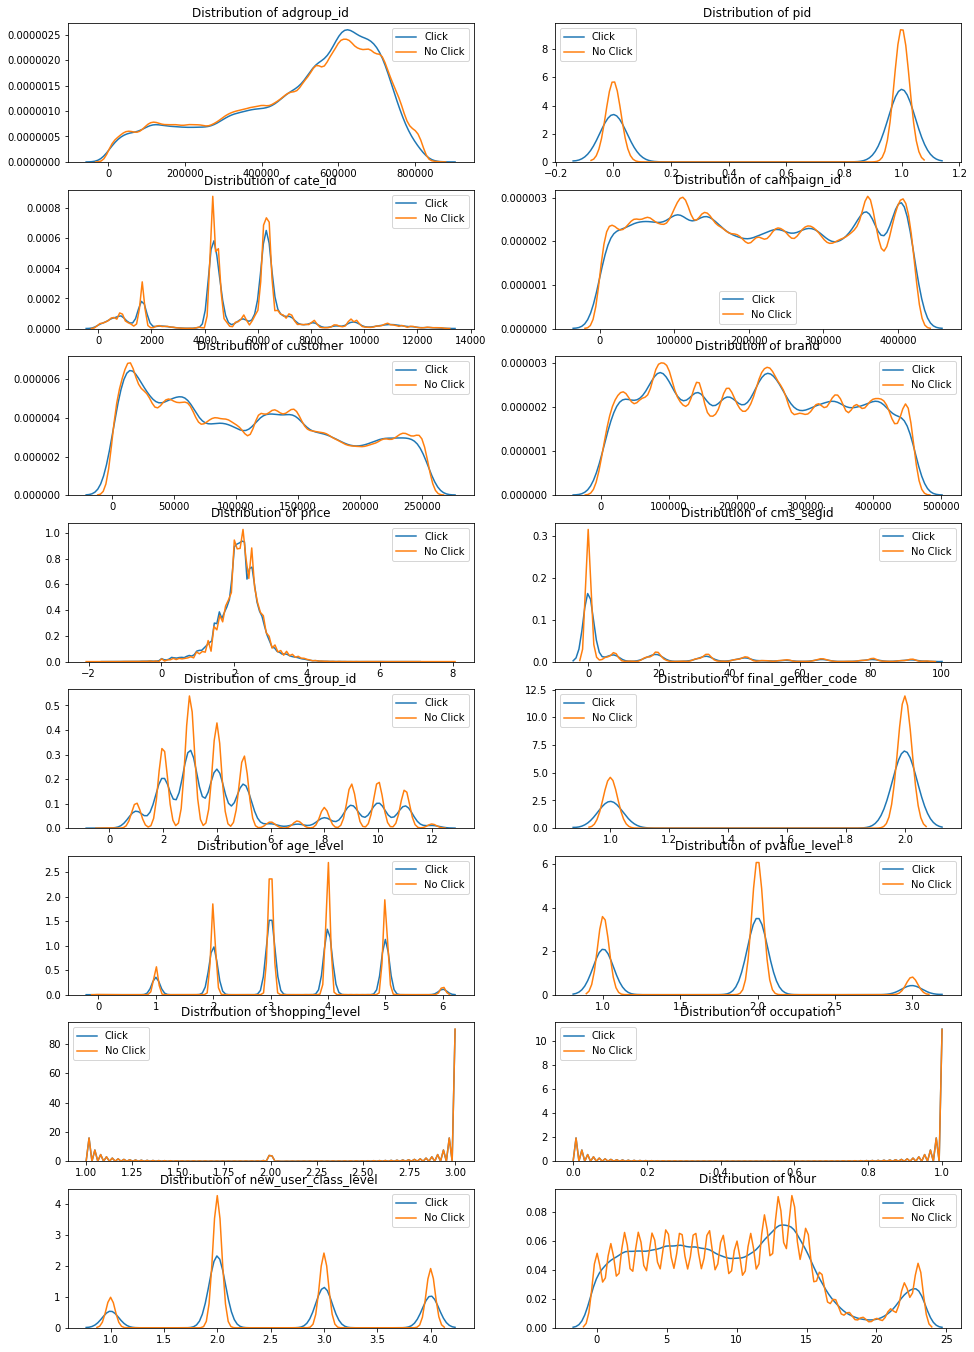

In [379]:
fig, axs = plt.subplots(8, 2, figsize =(16, 24))


for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr_clk[related_features[idx]], ax = ax, label = 'Click', legend = True)
    sns.kdeplot(ctr_noclk[related_features[idx]], ax = ax, label = 'No Click', legend = True)
    ax.set_title('Distribution of %s' %related_features[idx])
    
plt.savefig('Distribution_of_Features_in_clk_noclk_groups.png')

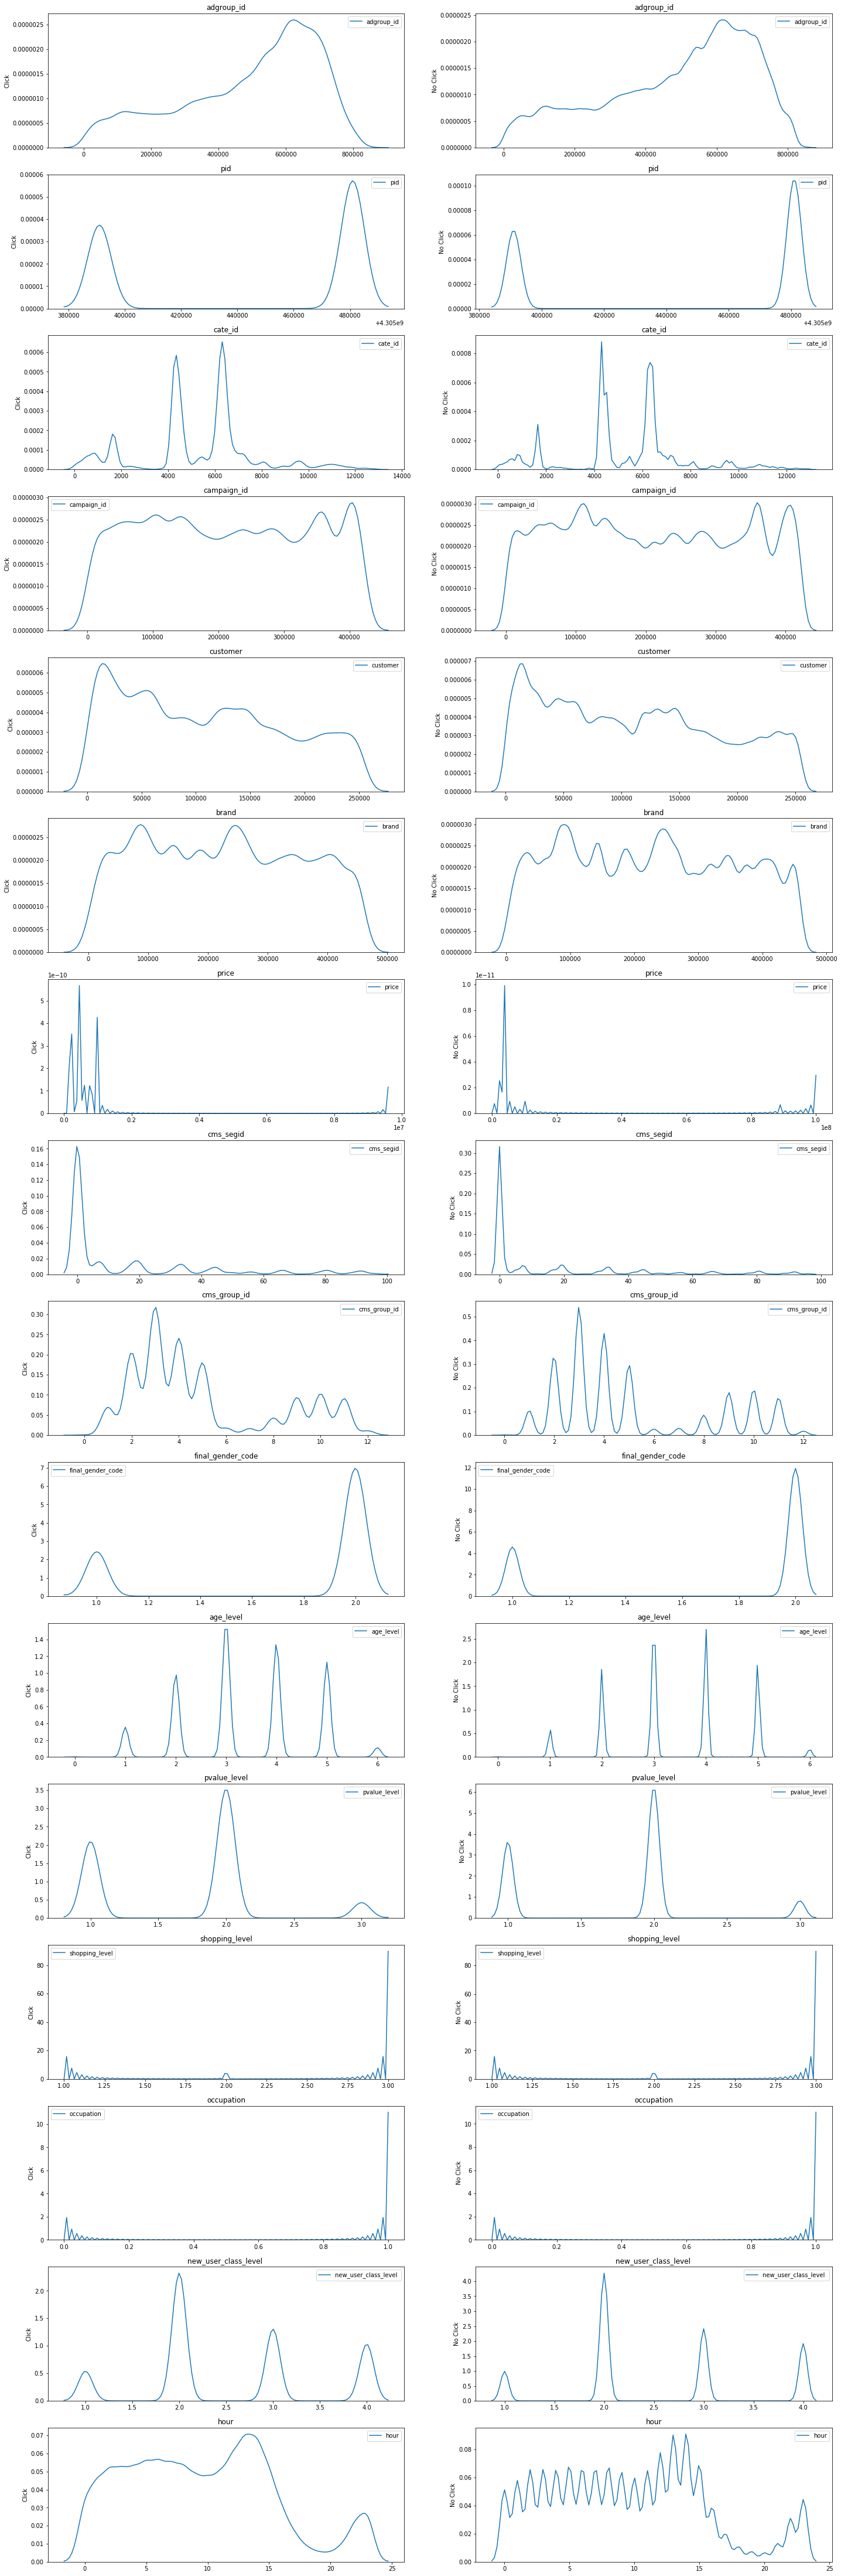

In [44]:
fig, axs = plt.subplots(16, 2, figsize =(24, 80))


for idx, ax in enumerate(axs.flatten()):
    if idx % 2 == 0:
        sns.kdeplot(ctr_clk[related_features[int(idx/2)]], ax = ax)
        ax.set_title(related_features[int(idx/2)])
        ax.set_ylabel('Click')
    if idx % 2 == 1:
        sns.kdeplot(ctr_noclk[related_features[int((idx-1)/2)]], ax = ax)
        ax.set_title(related_features[int((idx-1)/2)])
        ax.set_ylabel('No Click')
    

From the distribution of the features for the click and no-click group, the distributions of the features 'shopping_level' and 'occupation' for the two groups are highly overlapped.

* 'adgroup_id' - distribution is similar in two groups
* 'pid' - Different
* 'cate_id' - Different
* 'campaign_id' - slightly diff
* 'customer' -
* 'brand' -
* 'price' -
* 'cms_segid' -
* 'cms_group_id'-
* 'final_gender_code' -
* 'age_level' -
* 'pvalue_level' -
* 'shopping_level' - distribution is similar in two groups
* 'occupation'- distribution is similar in two groups
* 'new_user_class_level ' - 
* 'hour'

#### Handle missing values

In [54]:
missing_pct = ctr.isnull().sum()/len(ctr)
missing_pct

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.307273
price                    0.000000
cms_segid                0.060600
cms_group_id             0.060600
final_gender_code        0.060600
age_level                0.060600
pvalue_level             0.550642
shopping_level           0.060600
occupation               0.060600
new_user_class_level     0.313952
hour                     0.000000
dtype: float64

For the missing values, we simply dropped the 6% entries missing most of user features. For the three features ('brand', 'Pvalue' and 'new_user_class_level') have a high ratio of missing values, we imputed mode for now.

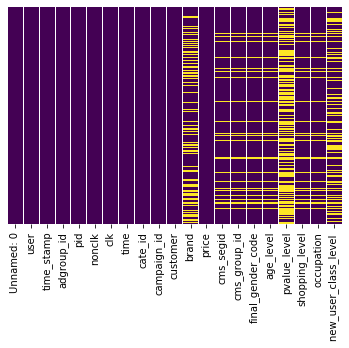

In [7]:
sns.heatmap(ctr.isnull(), yticklabels=False, cbar=False, cmap='viridis')

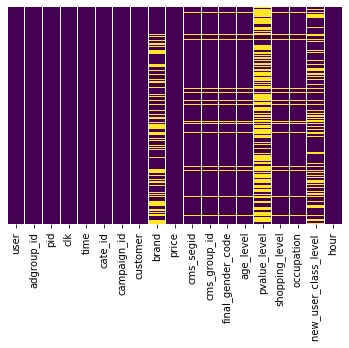

In [54]:
sns.heatmap(ctr_clk.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [55]:
missing_pct_clk = ctr_clk.isnull().sum()/len(ctr_clk)
missing_pct_clk

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.330644
price                    0.000000
cms_segid                0.063171
cms_group_id             0.063171
final_gender_code        0.063171
age_level                0.063171
pvalue_level             0.555319
shopping_level           0.063171
occupation               0.063171
new_user_class_level     0.319854
hour                     0.000000
dtype: float64

In [56]:
missing_pct_noclk = ctr_noclk.isnull().sum()/len(ctr_noclk)
missing_pct_noclk

user                     0.000000
adgroup_id               0.000000
pid                      0.000000
clk                      0.000000
time                     0.000000
cate_id                  0.000000
campaign_id              0.000000
customer                 0.000000
brand                    0.305989
price                    0.000000
cms_segid                0.060459
cms_group_id             0.060459
final_gender_code        0.060459
age_level                0.060459
pvalue_level             0.550385
shopping_level           0.060459
occupation               0.060459
new_user_class_level     0.313627
hour                     0.000000
dtype: float64

The missing values is randomly distributed and the missing percentage is almost same in both of clk and noclk groups. So we simply drop the entries without user features and 1) drop, or 2) impute mode for 'brand', 'pvalue_level' and 'new_user_class_level'

In [368]:
drop_index = ctr[ctr['cms_segid'].isnull()].index

In [369]:
ctr_complete = ctr.drop(drop_index, axis = 0)

In [370]:
ctr_complete_filled = ctr_complete.fillna(ctr_complete.mode().iloc[0])

In [52]:
ctr_complete_noclk = ctr_complete_filled[ctr_complete_filled.clk == 0]
ctr_complete_clk = ctr_complete_filled[ctr_complete_filled.clk == 1]

##### Comparison after imputation

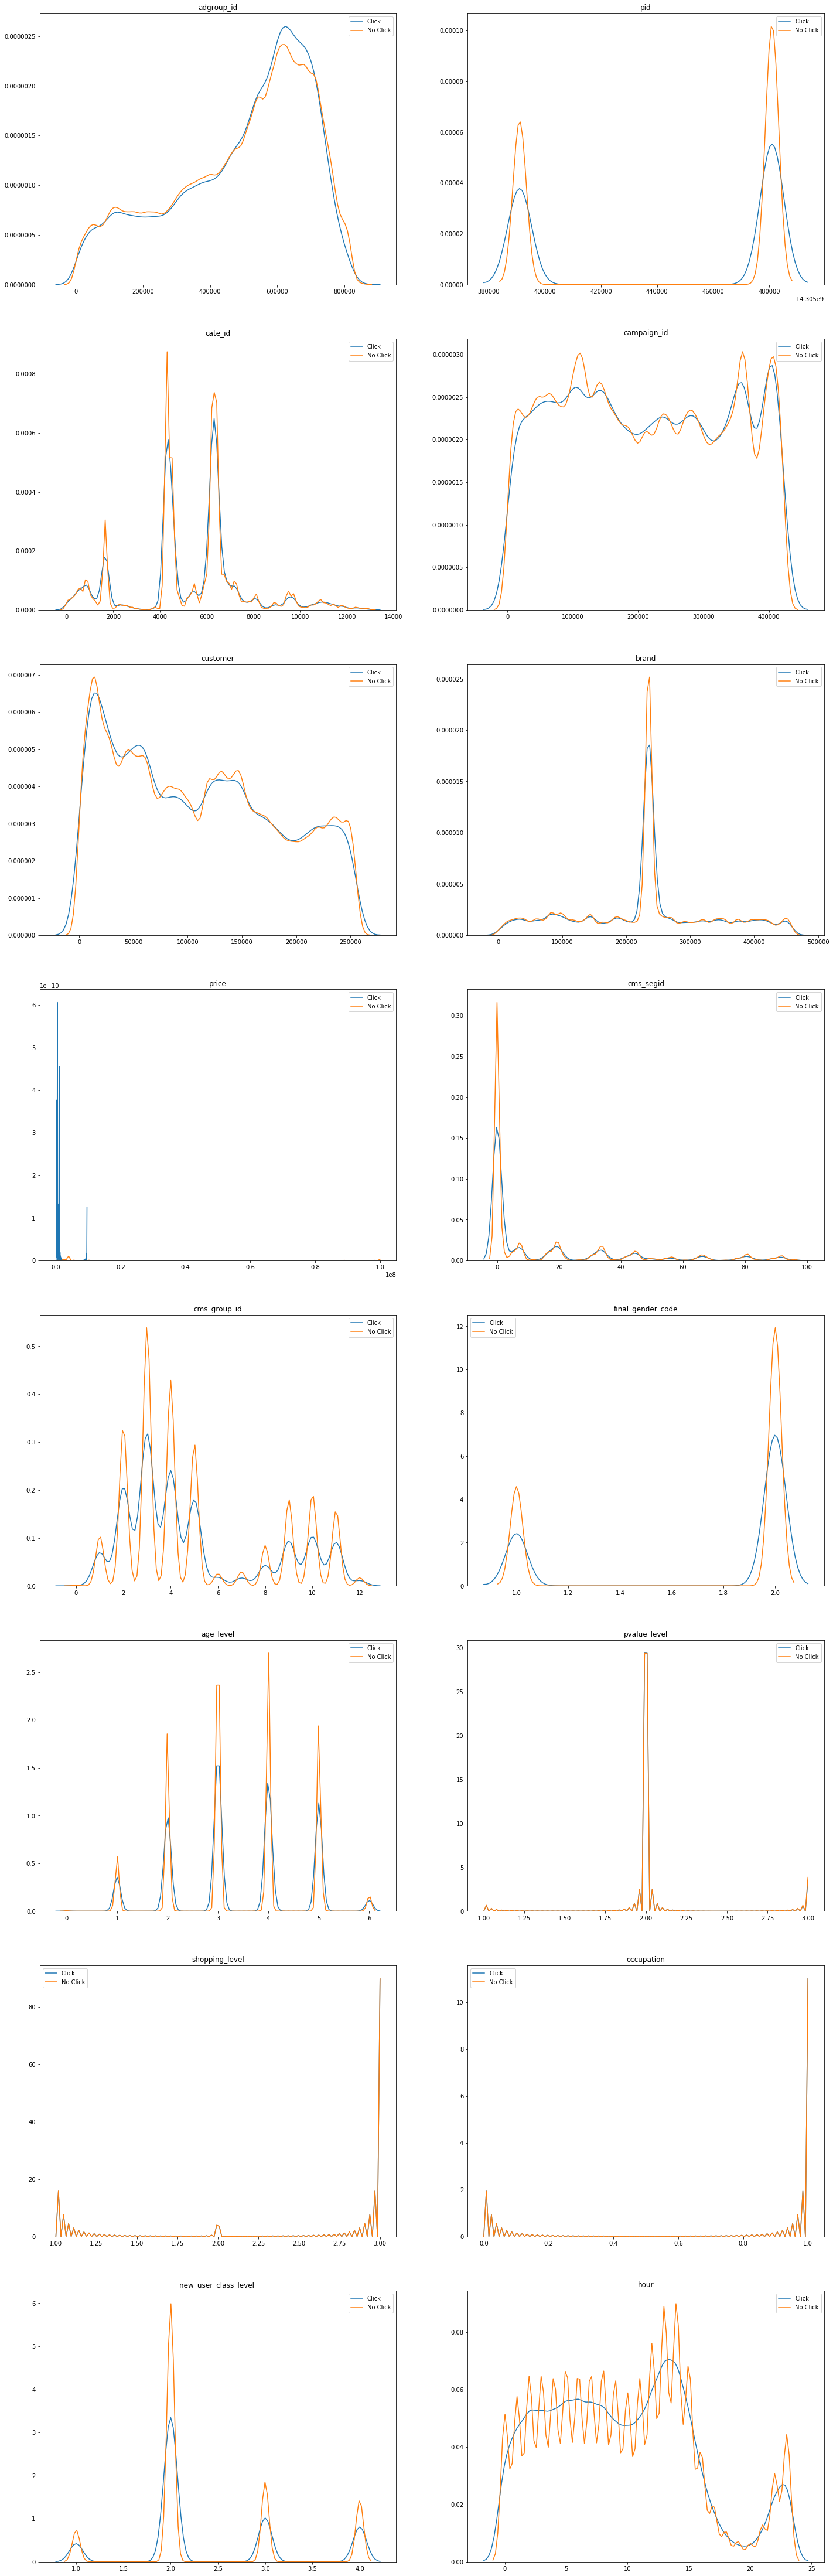

In [53]:
fig, axs = plt.subplots(8, 2, figsize =(24, 80))


for idx, ax in enumerate(axs.flatten()):
    sns.kdeplot(ctr_complete_clk[related_features[idx]], ax = ax, label = 'Click', legend = True)
    sns.kdeplot(ctr_complete_noclk[related_features[idx]], ax = ax, label = 'No Click', legend = True)
    ax.set_title(related_features[idx])

##### chi-square test for feature selection

In [371]:
ctr_chi2 = ctr_complete_filled.copy()
y = ctr_chi2.pop('clk')

In [372]:
#'time' is converted to hour, 'price' is the only numeric feature
ctr_chi2.drop(['user', 'time', 'price'], axis =1, inplace=True)

In [373]:
x = ctr_chi2

In [374]:
x.head()

,adgroup_id,pid,cate_id,campaign_id,customer,brand,cms_segid,cms_group_id,final_gender_code,age_level,pvalue_level,shopping_level,occupation,new_user_class_level,hour
0,11,1,5239,384809,25745,134255.0,49.0,6.0,2.0,6.0,2.0,3.0,0.0,2.0,2
1,11,1,5239,384809,25745,134255.0,0.0,4.0,2.0,4.0,2.0,1.0,0.0,2.0,1
2,15,0,7023,397386,51962,7465.0,0.0,5.0,2.0,5.0,2.0,3.0,0.0,2.0,7
3,38,1,4535,394495,5122,387739.0,76.0,10.0,1.0,4.0,3.0,2.0,0.0,4.0,14
5,38,1,4535,394495,5122,387739.0,88.0,11.0,1.0,5.0,1.0,3.0,0.0,1.0,13


In [375]:
chi2_stats, p_values = chi2(x, y)

In [377]:
x.columns

Index(['adgroup_id', 'pid', 'cate_id', 'campaign_id', 'customer', 'brand',
       'cms_segid', 'cms_group_id', 'final_gender_code', 'age_level',
       'pvalue_level', 'shopping_level', 'occupation', 'new_user_class_level ',
       'hour'],
      dtype='object')

In [376]:
chi2_test = pd.DataFrame({'chi2_stats':chi2_stats, 'p_values': p_values}, columns=['chi2_stats', 'p_values'], index =x.columns)
chi2_test

,chi2_stats,p_values
adgroup_id,2.734716e+06,0.000000e+00
pid,9.704074e+01,6.791531e-23
cate_id,6.669460e+04,0.000000e+00
campaign_id,6.668433e+06,0.000000e+00
customer,3.241516e+06,0.000000e+00
brand,3.573674e+05,0.000000e+00
cms_segid,3.337331e+03,0.000000e+00
cms_group_id,5.077701e+02,1.938098e-112
final_gender_code,3.503076e+01,3.245375e-09
age_level,4.672299e+00,3.065286e-02


In [57]:
ctr_complete_filled.to_csv('data/test/ctr_ad_user_test_imputed.csv')